## Import Library

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

## Load Data

In [4]:
data = pd.read_csv('churn.csv')

In [5]:
pd.set_option('display.max_columns', None)

## Data Understanding

In [6]:
#variable identifier : "RowNumber", "CustomerId", "Surname"
#categorical field : "Gender", "Geography"
#numerical : "CreditScore", "Age", "Tenure", "Balance", "NumOfProducts", "HasCrCard", "IsActiveMember", "EstimatedSalary"

In [7]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [8]:
data.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [10]:
identifier = ["RowNumber", "CustomerId", "Surname"]
categorical = ["Gender", "Geography"]
numerical = ["CreditScore", "Age", "Tenure", "Balance", "NumOfProducts", "HasCrCard", "IsActiveMember", "EstimatedSalary"]

In [11]:
data.drop(columns=identifier, inplace=True)

In [12]:
data.isnull().sum()

,0
CreditScore,0
Geography,0
Gender,0
Age,0
Tenure,0
Balance,0
NumOfProducts,0
HasCrCard,0
IsActiveMember,0
EstimatedSalary,0


In [13]:
data['Exited'].value_counts(normalize= True)

,proportion
Exited,
0,0.7963
1,0.2037


In [14]:
data['NumOfProducts'].value_counts()

,count
NumOfProducts,
1,5084
2,4590
3,266
4,60


In [15]:
data['Tenure'].value_counts()

,count
Tenure,
2,1048
1,1035
7,1028
8,1025
5,1012
3,1009
4,989
9,984
6,967


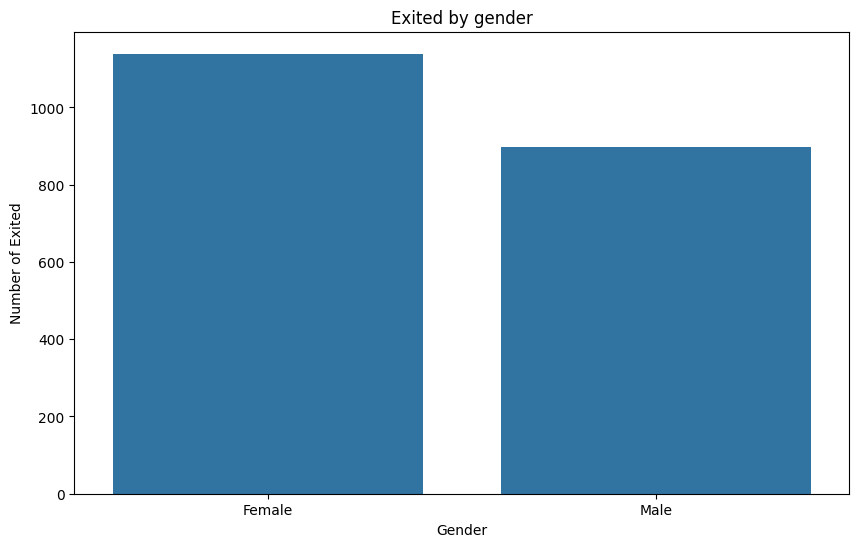

In [16]:
# Filter data where gender exited is 1
churn_data = data[data['Exited'] == 1]

# Create a countplot of the 'hour' column for fraudulent transactions
plt.figure(figsize=(10, 6))
sns.countplot(x='Gender', data=churn_data)
plt.title('Exited by gender')
plt.xlabel('Gender')
plt.ylabel('Number of Exited')
plt.show()

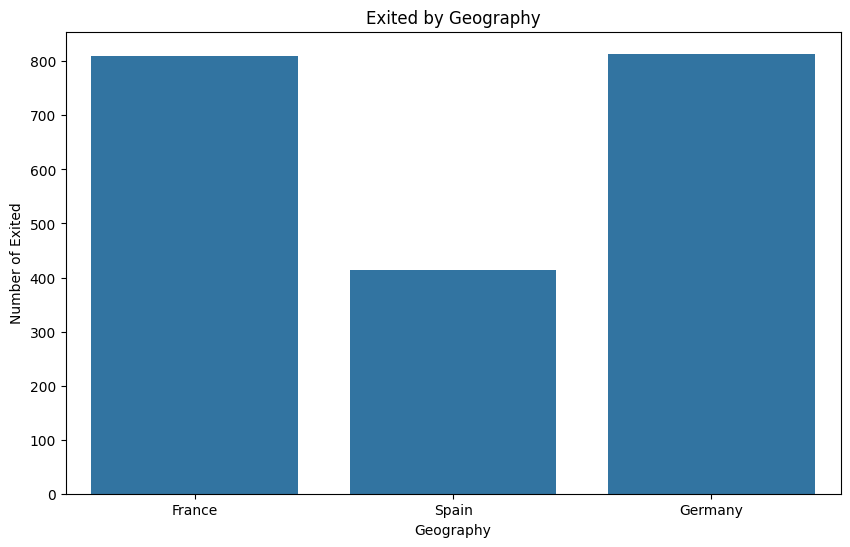

In [17]:
# Filter data where geography exited is 1
churn_data = data[data['Exited'] == 1]

# Create a countplot of the 'hour' column for fraudulent transactions
plt.figure(figsize=(10, 6))
sns.countplot(x='Geography', data=churn_data)
plt.title('Exited by Geography')
plt.xlabel('Geography')
plt.ylabel('Number of Exited')
plt.show()

## Data Preprocessing

In [18]:
final_data = pd.get_dummies(data=data, columns=categorical)

In [19]:
final_data

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Gender_Female,Gender_Male,Geography_France,Geography_Germany,Geography_Spain
0,619,42,2,0.00,1,1,1,101348.88,1,True,False,True,False,False
1,608,41,1,83807.86,1,0,1,112542.58,0,True,False,False,False,True
2,502,42,8,159660.80,3,1,0,113931.57,1,True,False,True,False,False
3,699,39,1,0.00,2,0,0,93826.63,0,True,False,True,False,False
4,850,43,2,125510.82,1,1,1,79084.10,0,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,False,True,True,False,False
9996,516,35,10,57369.61,1,1,1,101699.77,0,False,True,True,False,False
9997,709,36,7,0.00,1,0,1,42085.58,1,True,False,True,False,False
9998,772,42,3,75075.31,2,1,0,92888.52,1,False,True,False,True,False


## Modelling

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report

# Separate features and target variable
X = final_data.drop('Exited', axis=1)
y = final_data['Exited']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Logistic Regression

In [21]:
# Logistic Regression
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)
y_pred_logreg = logreg.predict(X_test)

label = ['not exited', 'exited']

# Evaluate Logistic Regression
print("Logistic Regression Metrics:")
print(classification_report(y_test,y_pred_logreg,target_names=label))

Logistic Regression Metrics:
              precision    recall  f1-score   support

  not exited       0.81      0.98      0.89      1607
      exited       0.45      0.07      0.12       393

    accuracy                           0.80      2000
   macro avg       0.63      0.53      0.51      2000
weighted avg       0.74      0.80      0.74      2000



### Random Forest

In [22]:
# Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)


# Evaluate Random Forest
print("\nRandom Forest Metrics:")
print(classification_report(y_test,y_pred_rf,target_names=label))


Random Forest Metrics:
              precision    recall  f1-score   support

  not exited       0.88      0.96      0.92      1607
      exited       0.74      0.45      0.56       393

    accuracy                           0.86      2000
   macro avg       0.81      0.71      0.74      2000
weighted avg       0.85      0.86      0.85      2000



### XGBoost

In [23]:
!pip install xgboost

from xgboost import XGBClassifier

# XGBoost
xgb = XGBClassifier(random_state=42)
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)

# Evaluate XGBoost
print("\nXGBoost Metrics:")
print(classification_report(y_test, y_pred_xgb, target_names=label))


XGBoost Metrics:
              precision    recall  f1-score   support

  not exited       0.89      0.95      0.92      1607
      exited       0.71      0.51      0.59       393

    accuracy                           0.86      2000
   macro avg       0.80      0.73      0.76      2000
weighted avg       0.85      0.86      0.85      2000



### Metrics Evaluation

Confusion Matrix:
[[1573   34]
 [ 365   28]]


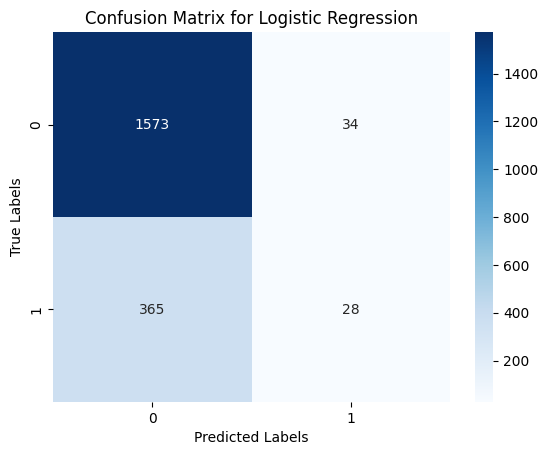

In [24]:
from sklearn.metrics import confusion_matrix
# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred_logreg)

# Print the confusion matrix
print("Confusion Matrix:")
print(cm)

# visualize the confusion matrix
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix for Logistic Regression")
plt.show()

Confusion Matrix:
[[1546   61]
 [ 216  177]]


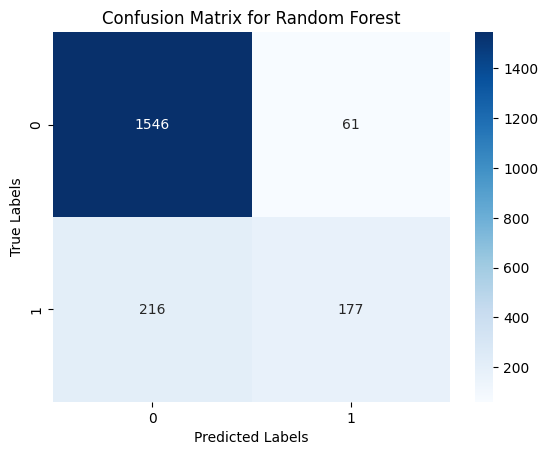

In [25]:
from sklearn.metrics import confusion_matrix
# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred_rf)

# Print the confusion matrix
print("Confusion Matrix:")
print(cm)

# You can also visualize the confusion matrix using seaborn
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix for Random Forest")
plt.show()

Confusion Matrix:
[[1523   84]
 [ 191  202]]


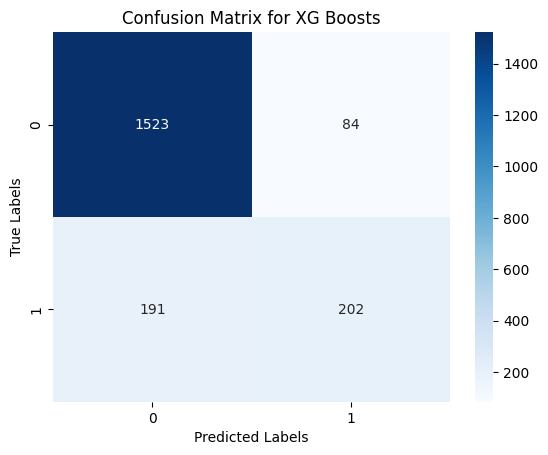

In [26]:
from sklearn.metrics import confusion_matrix
# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred_xgb)

# Print the confusion matrix
print("Confusion Matrix:")
print(cm)

# You can also visualize the confusion matrix using seaborn
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix for XG Boosts")
plt.show()

## XGBoost Hypertuning

In [27]:
# XGBoost HyperTuning

from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 5],
    'min_child_weight': [1, 2],
    'subsample': [0.8, 0.9],
    'colsample_bytree': [0.8, 0.9]
}

# Create an XGBoost classifier
xgb = XGBClassifier(random_state=42)

# Create GridSearchCV object
grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid, cv=3, scoring='f1', n_jobs=-1)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Print the best parameters
print("Best parameters found: ", grid_search.best_params_)

# Get the best model
best_xgb = grid_search.best_estimator_

# Make predictions with the best model
y_pred_best_xgb = best_xgb.predict(X_test)

# Evaluate the best model
print("\nBest XGBoost Metrics:")
print(classification_report(y_test, y_pred_best_xgb, target_names=label))

Best parameters found:  {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 5, 'min_child_weight': 1, 'n_estimators': 100, 'subsample': 0.9}

Best XGBoost Metrics:
              precision    recall  f1-score   support

  not exited       0.89      0.96      0.92      1607
      exited       0.75      0.51      0.60       393

    accuracy                           0.87      2000
   macro avg       0.82      0.73      0.76      2000
weighted avg       0.86      0.87      0.86      2000



Confusion Matrix:
[[1541   66]
 [ 194  199]]


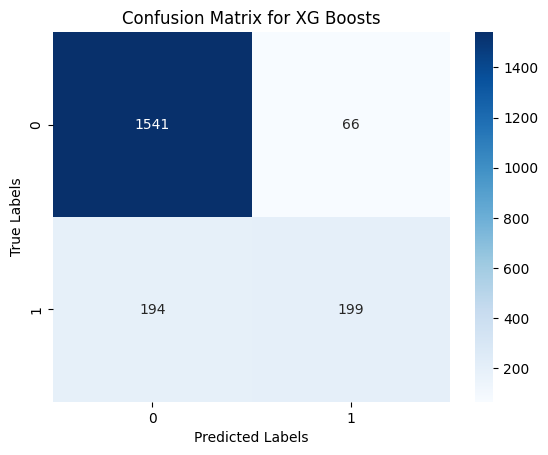

In [28]:
from sklearn.metrics import confusion_matrix
# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred_best_xgb)

# Print the confusion matrix
print("Confusion Matrix:")
print(cm)

# You can also visualize the confusion matrix using seaborn
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix for XG Boosts")
plt.show()

## Feature Engineering

In [29]:
data = pd.read_csv('churn.csv')

In [30]:
data.drop(columns=identifier, inplace=True)

In [31]:
# Calculate Customer Lifetime Value (CLV)
data['Customer_Lifetime_Value'] = data['Balance'] * data['Tenure']

In [32]:
def loyalty_indicator(tenure):
  if tenure <= 1:
    return 3 #'New'
  elif tenure <= 5:
    return 2 #'Loyal'
  else:
    return 1 #'Veteran'

data['Loyalty_Indicator'] = data['Tenure'].apply(loyalty_indicator)


In [33]:
def active_account_status(row):
  if row['IsActiveMember'] == 1 and row['NumOfProducts'] >= 2:
    return 1 #'Active'
  else:
    return 2 #'Inactive'

data['Active_Account_Status'] = data.apply(active_account_status, axis=1)


In [34]:
def calculate_risk_score(row):
  """
  Calculates the risk score for a customer based on CreditScore, Balance, and Tenure.
  """
  return row['CreditScore'] - (row['Balance'] / 1000) - (10 - row['Tenure'])

data['Risk_Score'] = data.apply(calculate_risk_score, axis=1)


In [35]:
def churn_risk_category(row):
  """
  Categorizes churn risk based on Risk_Score and Active_Account_Status.
  """
  if row['Risk_Score'] < 0 and row['Active_Account_Status'] == 'Inactive':
    return 3 #'HighRisk'
  elif row['Risk_Score'] < 50 and row['Active_Account_Status'] == 'Inactive':
    return 2 #'MediumRisk'
  else:
    return 1 #'LowRisk'

data['Churn_Risk_Category'] = data.apply(churn_risk_category, axis=1)


In [36]:
def credit_tier(credit_score):
  """
  Categorizes customers based on their credit score.
  """
  if credit_score >= 800:
    return 1 #'Excellent'
  elif credit_score >= 700:
    return 2 #'Good'
  elif credit_score >= 600:
    return 3 #'Fair'
  else:
    return 4 #'Poor'

data['Credit_Tier'] = data['CreditScore'].apply(credit_tier)


In [37]:
data['CreditScore'].describe()

,CreditScore
count,10000.000000
mean,650.528800
std,96.653299
min,350.000000
25%,584.000000
50%,652.000000
75%,718.000000
max,850.000000


In [38]:
def risk_geography(geography):
  """
  Assigns risk based on geography.
  """
  if geography == 'Spain':
    return 1
  else:
    return 2

data['Risk_Geography'] = data['Geography'].apply(risk_geography)


In [39]:
final_data = pd.get_dummies(data=data, columns=categorical)

### Split Data

In [40]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report

# Separate features and target variable
X = final_data.drop('Exited', axis=1)
y = final_data['Exited']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### SMOTE

In [41]:
!pip install imbalanced-learn

from imblearn.over_sampling import SMOTE

# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

### Logistic Regression

In [42]:
# Logistic Regression
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)
y_pred_logreg = logreg.predict(X_test)

label = ['not exited', 'exited']

# Evaluate Logistic Regression
print("Logistic Regression Metrics:")
print(classification_report(y_test,y_pred_logreg,target_names=label))

Logistic Regression Metrics:
              precision    recall  f1-score   support

  not exited       0.85      0.47      0.61      1607
      exited       0.24      0.67      0.35       393

    accuracy                           0.51      2000
   macro avg       0.54      0.57      0.48      2000
weighted avg       0.73      0.51      0.55      2000



### Random Forest

In [43]:
# Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)


# Evaluate Random Forest
print("\nRandom Forest Metrics:")
print(classification_report(y_test,y_pred_rf,target_names=label))


Random Forest Metrics:
              precision    recall  f1-score   support

  not exited       0.90      0.93      0.91      1607
      exited       0.66      0.56      0.61       393

    accuracy                           0.86      2000
   macro avg       0.78      0.75      0.76      2000
weighted avg       0.85      0.86      0.85      2000



### XGBoost

In [44]:
!pip install xgboost

from xgboost import XGBClassifier

# XGBoost
xgb = XGBClassifier(random_state=42)
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)

# Evaluate XGBoost
print("\nXGBoost Metrics:")
print(classification_report(y_test, y_pred_xgb, target_names=label))


XGBoost Metrics:
              precision    recall  f1-score   support

  not exited       0.90      0.93      0.91      1607
      exited       0.65      0.57      0.61       393

    accuracy                           0.85      2000
   macro avg       0.77      0.75      0.76      2000
weighted avg       0.85      0.85      0.85      2000



### Metrics Evaluation

Confusion Matrix:
[[754 853]
 [130 263]]


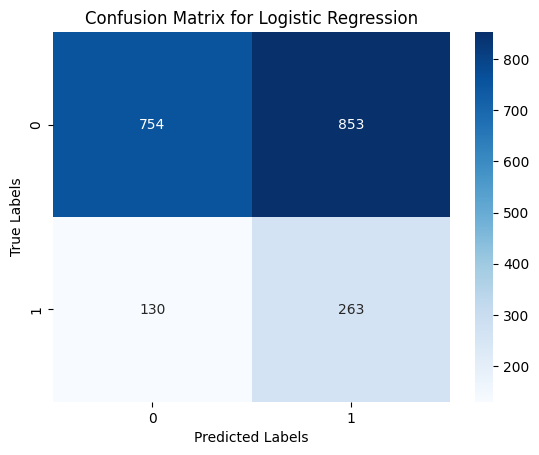

In [45]:
from sklearn.metrics import confusion_matrix
# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred_logreg)

# Print the confusion matrix
print("Confusion Matrix:")
print(cm)

# visualize the confusion matrix
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix for Logistic Regression")
plt.show()

Confusion Matrix:
[[1496  111]
 [ 173  220]]


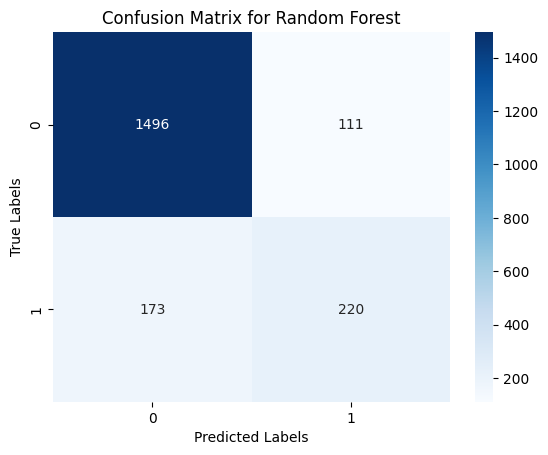

In [46]:
from sklearn.metrics import confusion_matrix
# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred_rf)

# Print the confusion matrix
print("Confusion Matrix:")
print(cm)

# You can also visualize the confusion matrix using seaborn
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix for Random Forest")
plt.show()

Confusion Matrix:
[[1487  120]
 [ 170  223]]


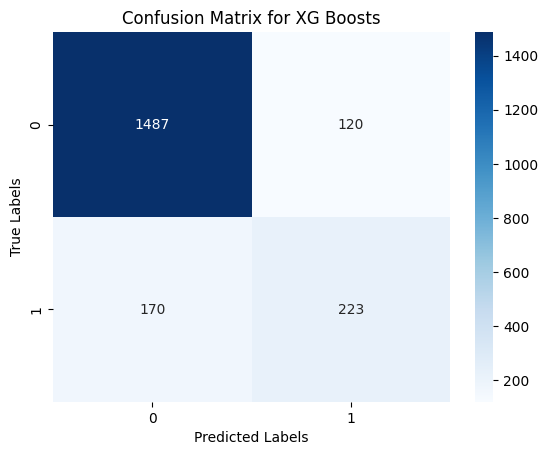

In [47]:
from sklearn.metrics import confusion_matrix
# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred_xgb)

# Print the confusion matrix
print("Confusion Matrix:")
print(cm)

# You can also visualize the confusion matrix using seaborn
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix for XG Boosts")
plt.show()

In [48]:
# XGBoost HyperTuning

from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 5],
    'min_child_weight': [1, 2],
    'subsample': [0.8, 0.9],
    'colsample_bytree': [0.8, 0.9]
}

# Create an XGBoost classifier
xgb = XGBClassifier(random_state=42)

# Create GridSearchCV object
grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid, cv=3, scoring='f1', n_jobs=-1)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Print the best parameters
print("Best parameters found: ", grid_search.best_params_)

# Get the best model
best_xgb = grid_search.best_estimator_

# Make predictions with the best model
y_pred_best_xgb = best_xgb.predict(X_test)

# Evaluate the best model
print("\nBest XGBoost Metrics:")
print(classification_report(y_test, y_pred_best_xgb, target_names=label))

Best parameters found:  {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 5, 'min_child_weight': 2, 'n_estimators': 100, 'subsample': 0.9}

Best XGBoost Metrics:
              precision    recall  f1-score   support

  not exited       0.90      0.93      0.91      1607
      exited       0.66      0.59      0.62       393

    accuracy                           0.86      2000
   macro avg       0.78      0.76      0.77      2000
weighted avg       0.85      0.86      0.86      2000



Confusion Matrix:
[[1488  119]
 [ 162  231]]


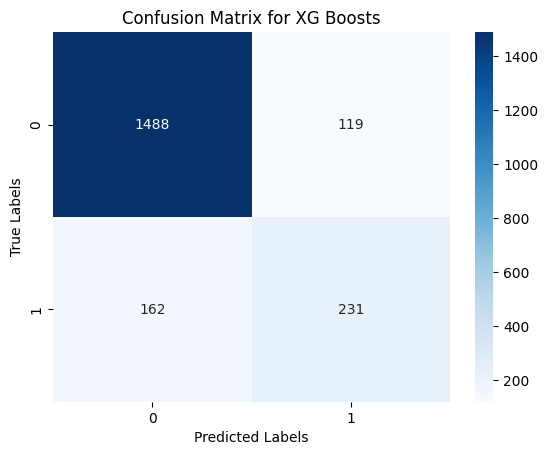

In [49]:
from sklearn.metrics import confusion_matrix
# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred_best_xgb)

# Print the confusion matrix
print("Confusion Matrix:")
print(cm)

# You can also visualize the confusion matrix using seaborn
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix for XG Boosts")
plt.show()

## Feature Importances

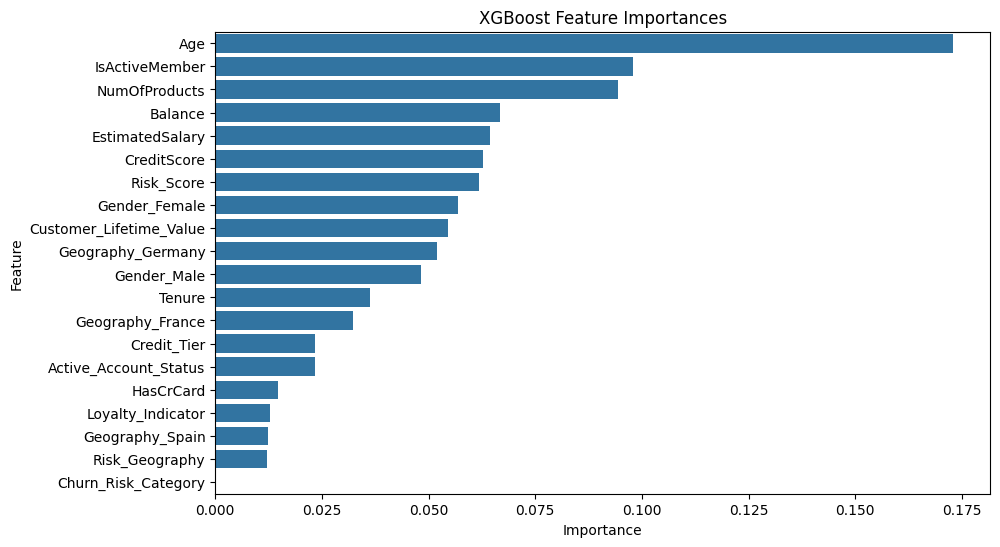

In [51]:
# Get feature importances
feature_importances = rf.feature_importances_

# Create a DataFrame to visualize feature importances
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Random Forest Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()